Area_Ratio = 1.3227050249242112%



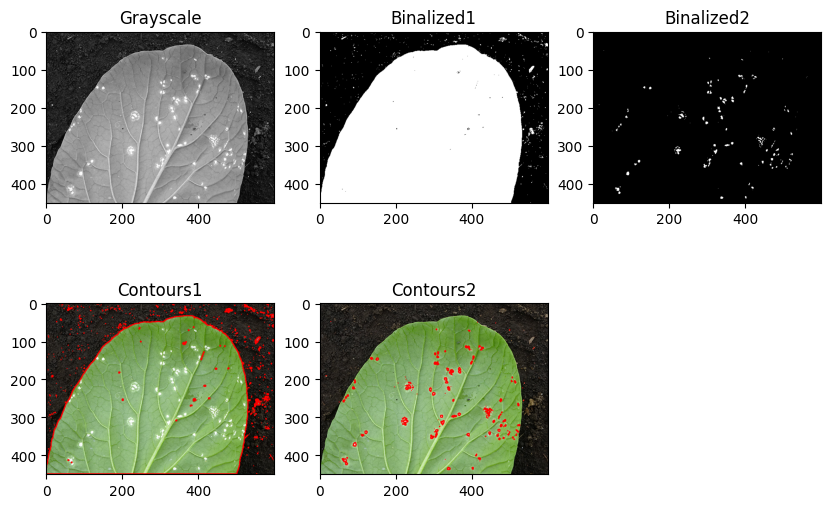

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#画像の読み込み
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('1.jpg')
assert img1 is not None, 'Failed to load image.'

#グレースケールに変換
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

#閾値の設定
threshold1 = 85     #閾値1
threshold2 = 230    #閾値2

#二値化
ret, img_binary1 = cv2.threshold(img_gray, threshold1, 255, cv2.THRESH_BINARY)
ret, img_binary2 = cv2.threshold(img_gray, threshold2, 255, cv2.THRESH_BINARY)

#二値化した画像に存在する輪郭を抽出、輪郭情報の書き出し
contours, hierarchy = cv2.findContours(img_binary1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img1, contours, -1, (0,0,255), 2)
contours, hierarchy = cv2.findContours(img_binary2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img2, contours, -1, (0,0,255), 2)

#閾値1以下の画素数
white_area1=cv2.countNonZero(img_binary1)
#閾値2以下の画素数
white_area2=cv2.countNonZero(img_binary2)

#閾値1に対する閾値2の面積比
print('Area_Ratio = '+str(white_area2/white_area1*100)+'%\n')

#画像を表示
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.title('Grayscale')
plt.subplot(3,3,2)
plt.imshow(cv2.cvtColor(img_binary1, cv2.COLOR_BGR2RGB))
plt.title('Binalized1')
plt.subplot(3,3,3)
plt.imshow(cv2.cvtColor(img_binary2, cv2.COLOR_BGR2RGB))
plt.title('Binalized2')
plt.subplot(3,3,4)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Contours1')
plt.subplot(3,3,5)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Contours2')

#輪郭の情報を書き込んだ画像を保存
ret = cv2.imwrite("Contours1.JPG", img1)
assert ret, 'Image could not be saved.'
ret = cv2.imwrite("Contours2.JPG", img2)
assert ret, 'Image could not be saved.'